# Notebook A: Mechalis Menton Fitting

### Setup imports

In [106]:
import pandas as pd
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import sys

source_dir = '../'
sys.path.append(source_dir)

from functions.plot_smoothed_data import plot_smoothed_data


### Load phenol data

In [107]:
peroxide_ratio_df = pd.read_csv('../data/phenol_bpa_hrp_to_peroxide_ratio.csv')

peroxide_ratio_df

,time,0.5:1 phe 1,0.5:1 phe 2,0.5:1 phe 3,1:1 phe 1,1:1 phe 2,1:1 phe 3,2:1 phe 1,2:1 phe 2,2:1 phe 3,...,3:1 phe 2,3:1 phe 3,1:1 BPA 1,1:1 BPA 2,1:1 BPA 3,2:1 BPA 1,2:1 BPA 2,2:1 BPA 3,3:1 BPA 1,3:1 BPA 2
0,0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.000000,1.000000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1,0.8394,0.8684,1.0109,0.8394,0.8912,0.9130,0.8182,0.7411,0.7429,...,0.920000,0.951087,0.9377,0.8925,0.8639,0.5405,0.7155,0.5353,0.7143,0.6940
2,5,0.9171,0.7947,0.8852,0.6166,0.7461,0.8859,0.5808,0.4213,0.4476,...,0.954286,0.961957,0.8370,0.7679,0.7311,0.1818,0.3684,0.2561,0.4433,0.4557
3,10,0.9223,0.9053,0.8852,0.5648,0.6839,0.6793,0.4798,0.2944,0.3095,...,0.920000,0.956522,0.8297,0.6636,0.6353,0.0860,0.2253,0.1468,0.3186,0.3366
4,20,0.8808,0.8895,0.8689,0.4456,0.5337,0.5815,0.4040,0.1777,0.2048,...,0.902857,0.934783,0.7106,0.6121,0.5378,0.0264,0.1053,0.0691,0.2053,0.2206
5,30,0.9016,0.8895,0.8798,0.5648,0.4974,0.4891,0.3636,0.1574,0.1524,...,0.868571,0.929348,0.6612,0.5779,0.4588,0.0198,0.0625,0.0259,0.1461,0.1643
6,45,0.9016,0.8737,0.8033,0.5803,0.4611,0.6141,0.2828,0.2132,0.1381,...,0.880000,0.907609,0.6026,0.5312,0.3983,0.0094,0.0362,0.0216,0.1051,0.1224
7,60,0.8549,0.8737,0.9508,0.6529,0.4197,0.5924,0.3030,0.1472,0.1333,...,0.840000,0.902174,0.6081,0.4751,0.3496,0.0109,0.0247,0.0173,0.0788,0.0918
8,90,0.8238,0.8474,0.9071,0.4870,0.4922,0.5924,0.2576,0.1218,0.2048,...,0.868571,0.885870,0.5458,0.4159,0.2958,0.0096,0.0164,0.0092,0.0509,0.0821


### Create a dataframe with smoothed values

In [108]:
# Create new time points from 0 to 90 minutes (1-minute intervals)
new_time_points = np.arange(0, 91, 1)

# Create an empty DataFrame for the new interpolated and smoothed data
interpolated_df = pd.DataFrame({'time': new_time_points})

# Produce a linear interpolation of each column
for col in peroxide_ratio_df.columns[1:]:

    # first create linear interpolations between measured time points
    interpolation_func = interp1d(
        peroxide_ratio_df['time'], 
        peroxide_ratio_df[col], 
        kind='linear', 
        fill_value="extrapolate"
    )
    interpolated_values = interpolation_func(new_time_points)
    interpolated_df[col] = interpolated_values

# Apply the Savitzky-Golay filter to smooth the interpolated data
smoothed_df = pd.DataFrame({'time': new_time_points})

# Define the window length and polynomial order
window_length = 15  # Should be odd and larger for smoother curves
poly_order = 3

for col in interpolated_df.columns[1:]:
    first_val = interpolated_df[col].values[0]
    # smoothed_values = savgol_filter(interpolated_df[col], window_length, poly_order, mode='constant', cval=first_val)
    smoothed_values = savgol_filter(interpolated_df[col], window_length, poly_order)
    smoothed_df[f'{col} smoothed'] = smoothed_values

smoothed_df.head(10)

,time,0.5:1 phe 1 smoothed,0.5:1 phe 2 smoothed,0.5:1 phe 3 smoothed,1:1 phe 1 smoothed,1:1 phe 2 smoothed,1:1 phe 3 smoothed,2:1 phe 1 smoothed,2:1 phe 2 smoothed,2:1 phe 3 smoothed,...,3:1 phe 2 smoothed,3:1 phe 3 smoothed,1:1 BPA 1 smoothed,1:1 BPA 2 smoothed,1:1 BPA 3 smoothed,2:1 BPA 1 smoothed,2:1 BPA 2 smoothed,2:1 BPA 3 smoothed,3:1 BPA 1 smoothed,3:1 BPA 2 smoothed
0,0,0.936296,0.977614,1.023275,0.979198,0.983581,0.959989,0.970015,0.955943,0.951674,...,0.965900,0.982116,0.996026,0.976254,0.969392,0.898251,0.950523,0.883307,0.939738,0.928507
1,1,0.909320,0.902783,0.989959,0.871283,0.914350,0.950444,0.858503,0.800130,0.805094,...,0.955892,0.970930,0.947151,0.920365,0.900706,0.668313,0.781156,0.676147,0.789782,0.781169
2,2,0.892837,0.851494,0.962070,0.784933,0.858113,0.934218,0.766613,0.672818,0.684635,...,0.948355,0.963115,0.909220,0.871846,0.843393,0.487286,0.642508,0.513589,0.668310,0.662885
3,3,0.885127,0.820488,0.939146,0.717612,0.813277,0.912459,0.692273,0.570889,0.587486,...,0.942889,0.958150,0.880776,0.830075,0.796206,0.349403,0.531247,0.390248,0.572089,0.570249
4,4,0.884472,0.806503,0.920726,0.666786,0.778250,0.886316,0.633413,0.491228,0.510837,...,0.939095,0.955515,0.860361,0.794431,0.757894,0.248896,0.444042,0.300738,0.497884,0.499853
5,5,0.889153,0.806281,0.906350,0.629917,0.751438,0.856940,0.587961,0.430718,0.451879,...,0.936576,0.954690,0.846520,0.764292,0.727210,0.179996,0.377561,0.239674,0.442464,0.448288
6,6,0.897452,0.816559,0.895556,0.604470,0.731249,0.825480,0.553844,0.386243,0.407801,...,0.934930,0.955153,0.837796,0.739037,0.702905,0.136936,0.328472,0.201671,0.402595,0.412149
7,7,0.907651,0.834078,0.887884,0.587909,0.716089,0.793085,0.528992,0.354687,0.375793,...,0.933761,0.956384,0.832732,0.718045,0.683730,0.113948,0.293443,0.181342,0.375043,0.388028
8,8,0.923309,0.854884,0.880110,0.578163,0.704944,0.766996,0.513594,0.336023,0.356903,...,0.936134,0.959335,0.828946,0.703359,0.671163,0.112594,0.272766,0.182456,0.361260,0.378194
9,9,0.923539,0.869026,0.878577,0.565810,0.690968,0.735627,0.495554,0.312575,0.332459,...,0.931237,0.958077,0.823767,0.686510,0.654134,0.094677,0.246764,0.162862,0.338629,0.356540


### Plot Phenol and BPA data

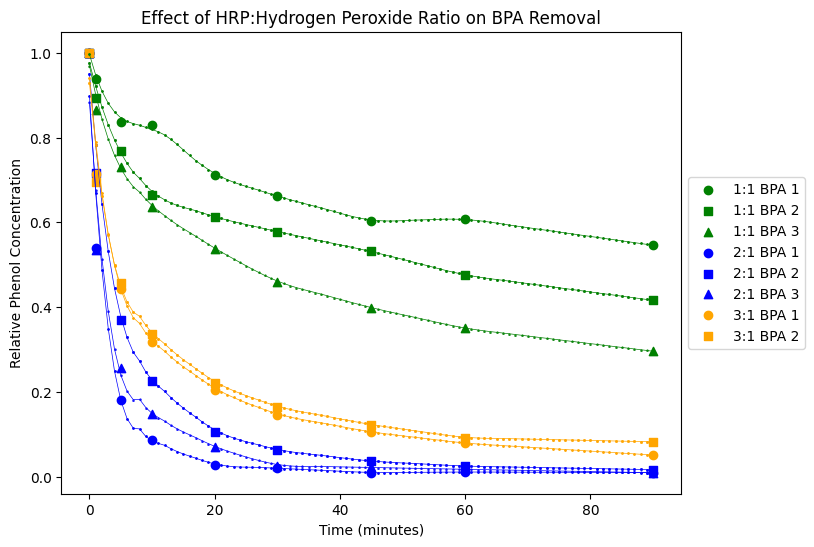

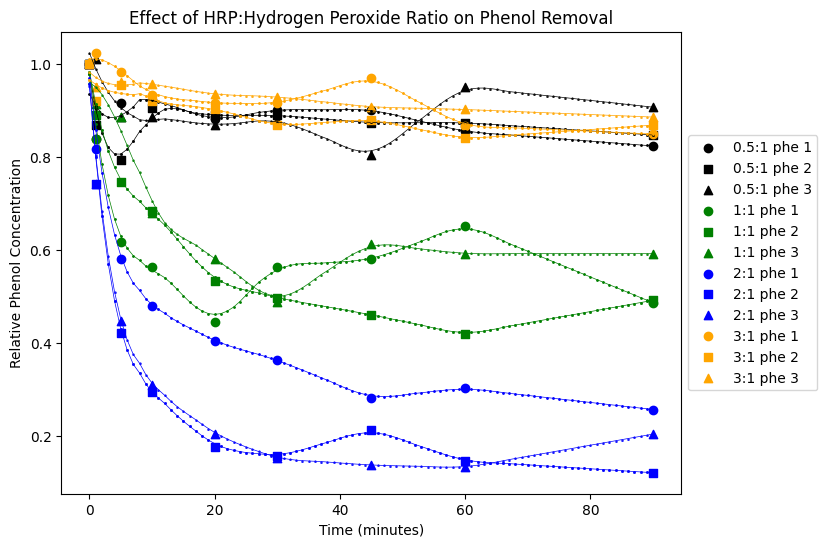

In [109]:
plot_smoothed_data(peroxide_ratio_df, smoothed_df, compound='BPA')
plot_smoothed_data(peroxide_ratio_df, smoothed_df, compound='phe')

### Make a dataframe of enzymatic rates over time

In [110]:
# start the dataframe with by using the smoothed time column
rates_df = pd.DataFrame({'time': smoothed_df['time']})
rates_df_cols = smoothed_df.columns[1:]


for col in rates_df_cols:
    rate_values = savgol_filter(smoothed_df[col], window_length, poly_order, deriv=1)
    rates_df[f'{col} rate'] = -1 * rate_values

rates_df

,time,0.5:1 phe 1 smoothed rate,0.5:1 phe 2 smoothed rate,0.5:1 phe 3 smoothed rate,1:1 phe 1 smoothed rate,1:1 phe 2 smoothed rate,1:1 phe 3 smoothed rate,2:1 phe 1 smoothed rate,2:1 phe 2 smoothed rate,2:1 phe 3 smoothed rate,...,3:1 phe 2 smoothed rate,3:1 phe 3 smoothed rate,1:1 BPA 1 smoothed rate,1:1 BPA 2 smoothed rate,1:1 BPA 3 smoothed rate,2:1 BPA 1 smoothed rate,2:1 BPA 2 smoothed rate,2:1 BPA 3 smoothed rate,3:1 BPA 1 smoothed rate,3:1 BPA 2 smoothed rate
0,0,0.026090,0.080072,0.037028,0.115173,0.073110,7.499855e-03,0.118712,0.165760,0.155602,...,0.009103,0.011149,0.051899,0.058924,0.072138,0.243857,0.180126,0.218344,0.158674,0.155326
1,1,0.017461,0.058117,0.031065,0.094164,0.060631,1.393466e-02,0.099396,0.137884,0.130091,...,0.007325,0.008288,0.041478,0.051552,0.061202,0.197158,0.150068,0.176304,0.131258,0.127686
2,2,0.010092,0.038873,0.025615,0.075387,0.049525,1.936795e-02,0.081931,0.112765,0.107058,...,0.005797,0.005818,0.032300,0.044754,0.051339,0.155376,0.122959,0.138771,0.106629,0.102933
3,3,0.003982,0.022342,0.020677,0.058842,0.039792,2.379973e-02,0.066317,0.090401,0.086504,...,0.004519,0.003738,0.024367,0.038532,0.042551,0.118512,0.098797,0.105746,0.084788,0.081069
4,4,-0.000870,0.008524,0.016253,0.044528,0.031432,2.723001e-02,0.052555,0.070793,0.068428,...,0.003491,0.002049,0.017677,0.032885,0.034836,0.086565,0.077584,0.077229,0.065735,0.062094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,0.001037,0.000877,0.001457,0.005530,-0.002417,1.949588e-16,0.001513,0.000847,-0.002383,...,-0.000952,0.000543,0.002077,0.001973,0.001793,0.000043,0.000277,0.000270,0.000930,0.000323
87,87,0.001037,0.000877,0.001457,0.005530,-0.002417,1.359161e-16,0.001513,0.000847,-0.002383,...,-0.000952,0.000543,0.002077,0.001973,0.001793,0.000043,0.000277,0.000270,0.000930,0.000323
88,88,0.001037,0.000877,0.001457,0.005530,-0.002417,5.547474e-17,0.001513,0.000847,-0.002383,...,-0.000952,0.000543,0.002077,0.001973,0.001793,0.000043,0.000277,0.000270,0.000930,0.000323
89,89,0.001037,0.000877,0.001457,0.005530,-0.002417,-4.636517e-17,0.001513,0.000847,-0.002383,...,-0.000952,0.000543,0.002077,0.001973,0.001793,0.000043,0.000277,0.000270,0.000930,0.000323


### Define a function to plot enzymatic rate vs. substrate concentration

In [111]:
def plot_rates_vs_conc(smoothed_df, rates_df, compound='phe'):
    plt.figure(figsize=(8, 6))

    # define the colors and markers for each ratio and trial
    ratio_to_color = {
        '0.5:1': 'black',
        '1:1': 'green',
        '2:1': 'blue',
        '3:1': 'orange',
    }

    trial_to_marker = {
        '1': 'o',
        '2': 's',
        '3': '^',
    }

    relevant_cols = [col for col in smoothed_df.columns if compound in col]

    # loop over the relevant columns and plot the measured and smoothed data
    for col in relevant_cols:
        # get the color and marker for each ratio and trial
        color = ratio_to_color[col.split(' ')[0]]
        marker = trial_to_marker[col.split(' ')[2]]
        # remove the last word from the column name to get label
        label = ' '.join(col.split(' ')[:-1])

        plt.plot(smoothed_df[col], rates_df[f'{col} rate'], marker=marker, color=color, label=label)


    # Setting labels, title, and legend
    compound_name = 'Phenol' if compound == 'phe' else 'BPA'
    plt.xlabel(f'Relative {compound_name} Concentration')
    plt.ylabel('Smoothed Enzymatic Rate')
    plt.title(f'Enzymatic Rate vs. {compound_name} Concentration for Different HRP:Hydrogen Peroxide Ratios')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

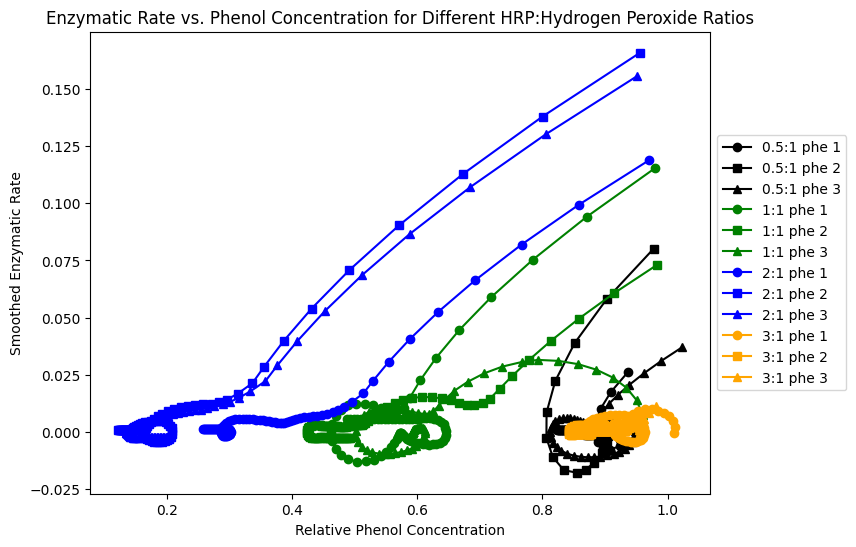

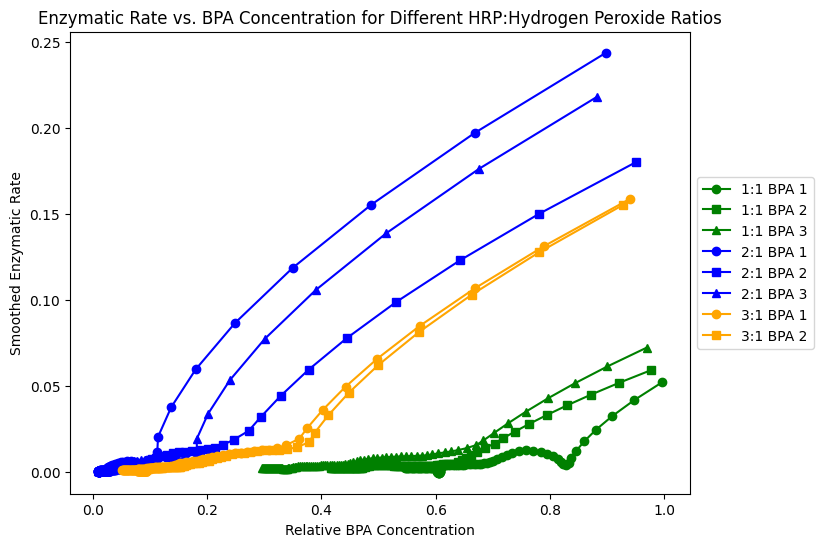

In [112]:
plot_rates_vs_conc(smoothed_df, rates_df, compound='phe')
plot_rates_vs_conc(smoothed_df, rates_df, compound='BPA')

### Define a function to find the Michaelis-Menten values for a given trial

In [113]:
from scipy.optimize import curve_fit

# Define the Michaelis-Menten equation
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

def plot_michaelis_menten_values(trial, smoothed_df, rates_df, cutoff_rate=0.02):
    # find the rates that are before the cutoff rate
    rates = rates_df[f'{trial} smoothed rate']
    rates_with_cutoff = []

    # get all the rates until the rate is below the cutoff
    for rate in rates:
        if rate > cutoff_rate:
            rates_with_cutoff.append(rate)
        else:
            break

    # get the max time
    num_timepoints = len(rates_with_cutoff)

    concs_with_cutoff = list(smoothed_df[f'{trial} smoothed'][:num_timepoints])

    # find the minimum substrate concentration and rate
    offset_conc = min(concs_with_cutoff)
    offset_rate = min(rates_with_cutoff)
    max_time = num_timepoints - 1

    # substract the minimum substrate concentration from all the substrate concentrations
    concs_with_cutoff = [conc - offset_conc for conc in concs_with_cutoff]
    rates_with_cutoff = [rate - offset_rate for rate in rates_with_cutoff]

    # Fit the data using curve_fit
    # Adjusting bounds or providing initial guesses
    popt, pcov = curve_fit(michaelis_menten, concs_with_cutoff, rates_with_cutoff, 
                        p0=[0.15, 1], bounds=(0, np.inf))

    # popt contains the optimized values for Vmax and Km
    Vmax, Km = popt

    return trial, Vmax, Km, offset_rate, offset_conc, max_time

### Make dataframe of fit parametes

In [121]:
# Trials to get parameters
trials_to_get_params = [
    '1:1 phe 1', 
    '1:1 phe 2',
    '2:1 phe 1',
    '2:1 phe 2',
    '2:1 phe 3',
    '1:1 BPA 1',
    '1:1 BPA 2',
    '1:1 BPA 3',
    '2:1 BPA 1',
    '2:1 BPA 2',
]

# Create an empty list to store the results
results = []

# Loop through trials and calculate parameters
for trial in trials_to_get_params:
    cutoff = 0.000 if 'phe' in trial else 0.000
    trial_name, Vmax, Km, offset_rate, offset_conc, max_time = plot_michaelis_menten_values(trial, smoothed_df, rates_df, cutoff_rate=cutoff)
    
    # Append the results as a row (list) to the results list
    results.append([trial_name, Vmax, Km, offset_rate, offset_conc, max_time])

# Convert the results list to a DataFrame
columns = ['Trial', 'Vmax', 'Km', 'Offset Rate', 'Offset Concentration', 'Max Time']
mm_param_df = pd.DataFrame(results, columns=columns)

mm_param_df

,Trial,Vmax,Km,Offset Rate,Offset Concentration,Max Time
0,1:1 phe 1,31149.680252,154463.535153,0.003649,0.463712,19
1,1:1 phe 2,72.482519,820.798300,0.000172,0.423242,60
2,2:1 phe 1,51014.095883,376235.049019,0.000100,0.285371,47
3,2:1 phe 2,25366.790856,124278.286352,0.000425,0.161356,28
4,2:1 phe 3,68833.365711,395990.565279,0.000046,0.133820,57
5,1:1 BPA 1,40.523439,548.492617,0.000083,0.603004,48
6,1:1 BPA 2,57.857243,1096.189827,0.001883,0.415900,90
7,1:1 BPA 3,91.838766,1644.122249,0.001719,0.295800,90
8,2:1 BPA 1,3.322162,10.740215,0.000070,0.009586,47
9,2:1 BPA 2,136997.348154,801193.278415,0.000251,0.016400,90


### Make clearer plot of enzymatic rate vs concentration

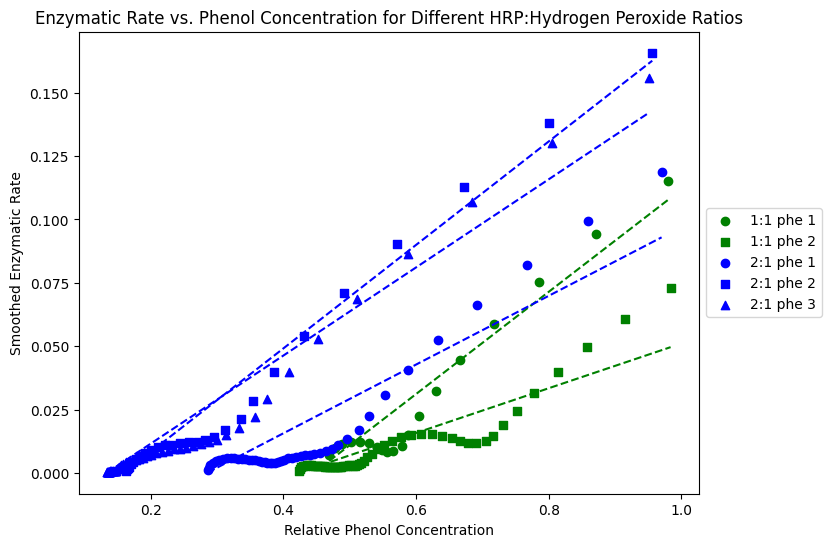

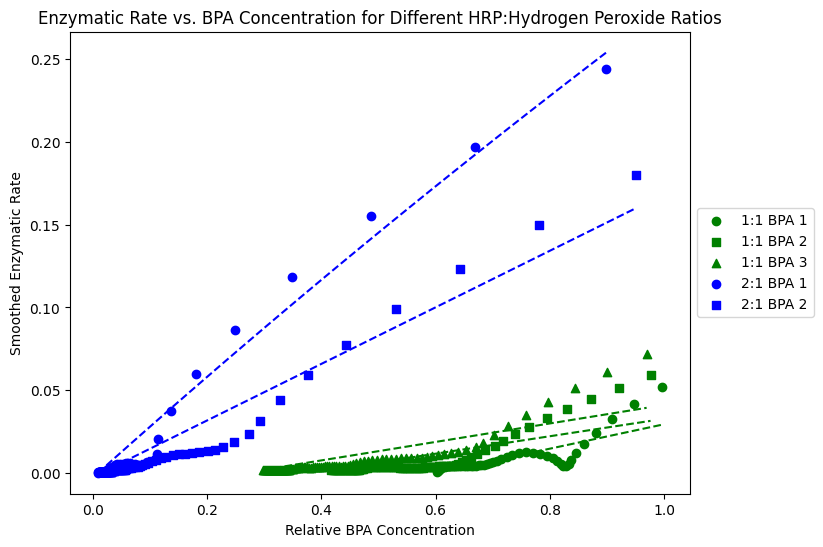

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Michaelis-Menten equation for fitted curves
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Updated function to plot the points and fitted curves with offsets correctly applied
def plot_rates_vs_conc(smoothed_df, rates_df, param_df, compound='phe'):
    plt.figure(figsize=(8, 6))

    # Define the colors and markers for each ratio and trial
    ratio_to_color = {
        '0.5:1': 'black',
        '1:1': 'green',
        '2:1': 'blue',
        '3:1': 'orange',
    }

    trial_to_marker = {
        '1': 'o',
        '2': 's',
        '3': '^',
    }

    # Loop through the param_df to get only the trials included in the DataFrame
    for _, row in param_df.iterrows():
        trial = row['Trial']
        max_time = row['Max Time']
        Vmax = row['Vmax']
        Km = row['Km']
        offset_rate = row['Offset Rate']
        offset_conc = row['Offset Concentration']

        # Extract the compound type from the trial string (e.g., 'phe' or 'BPA')
        if compound not in trial:
            continue  # Skip if the compound is not in the trial

        # Get the corresponding smoothed and rate columns from the smoothed_df and rates_df
        conc_col = f'{trial} smoothed'
        rate_col = f'{trial} smoothed rate'

        # Get data up to the Max Time
        smoothed_concs = smoothed_df[conc_col][:max_time]
        smoothed_rates = rates_df[rate_col][:max_time]

        # Get the color and marker for the current trial
        color = ratio_to_color[trial.split(' ')[0]]
        marker = trial_to_marker[trial.split(' ')[2]]

        # Plot the points (no lines connecting them)
        plt.scatter(smoothed_concs, smoothed_rates, marker=marker, color=color, label=trial)

        # Generate fitted curves using Michaelis-Menten equation
        conc_fit = np.linspace(min(smoothed_concs), max(smoothed_concs), 100)

        # Apply offset concentration and rate
        rate_fit = michaelis_menten(conc_fit - offset_conc, Vmax, Km) + offset_rate

        # Plot the fitted curve (with line, no markers)
        plt.plot(conc_fit, rate_fit, color=color, linestyle='--')

    # Setting labels, title, and legend
    compound_name = 'Phenol' if compound == 'phe' else 'BPA'
    plt.xlabel(f'Relative {compound_name} Concentration')
    plt.ylabel('Smoothed Enzymatic Rate')
    plt.title(f'Enzymatic Rate vs. {compound_name} Concentration for Different HRP:Hydrogen Peroxide Ratios')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Example usage:
plot_rates_vs_conc(smoothed_df, rates_df, mm_param_df, compound='phe')
plot_rates_vs_conc(smoothed_df, rates_df, mm_param_df, compound='BPA')


### Define a function to create time course data from a row of parameters

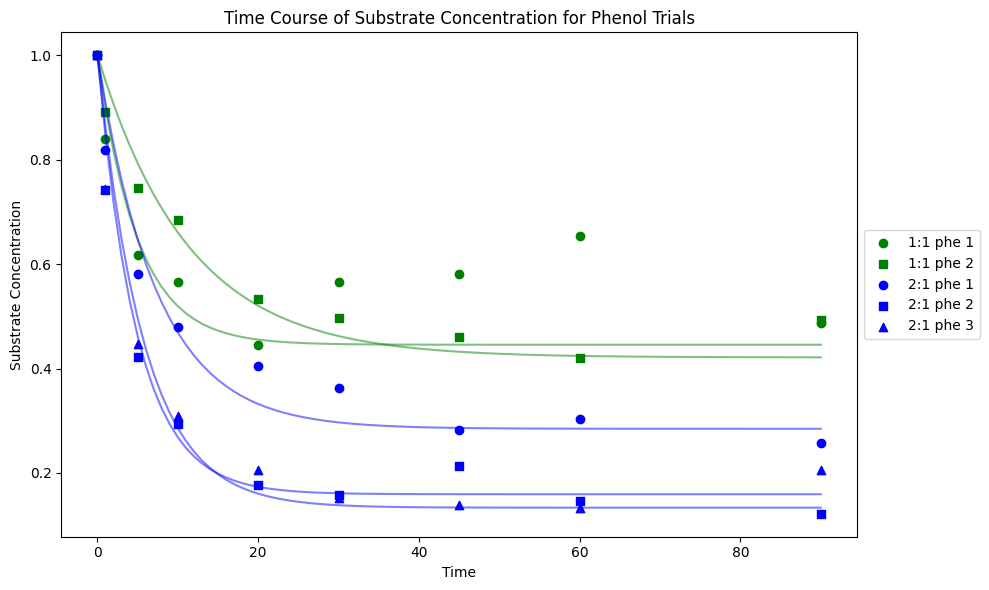

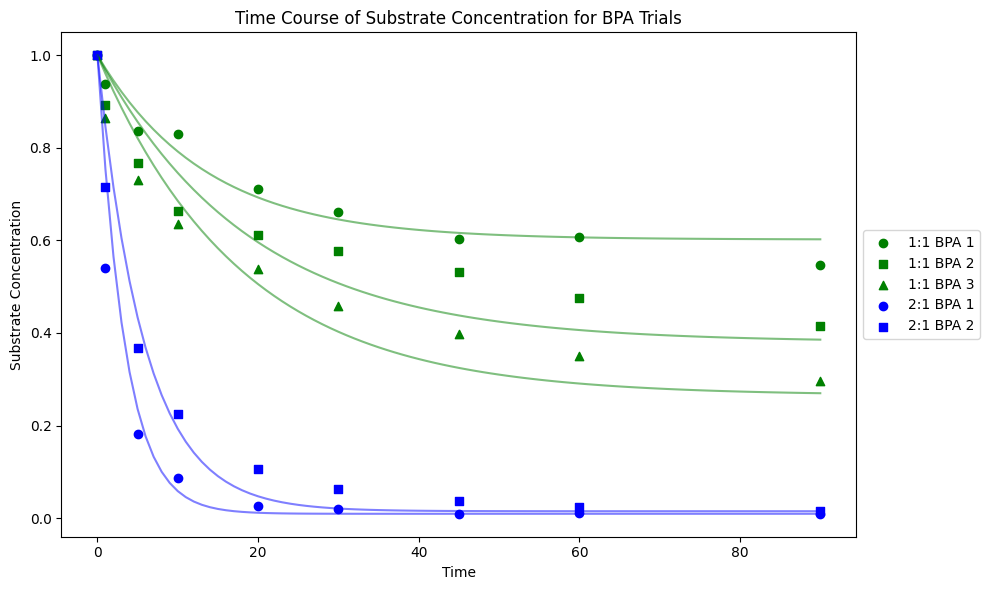

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Michaelis-Menten equation with offsets
def michaelis_menten_with_offsets(S, t, Vmax, Km, offset_conc, offset_rate):
    # Apply the offset concentration only when calculating the rate
    effective_S = S - offset_conc
    
    # Calculate the reaction rate using the Michaelis-Menten equation
    rate = (Vmax * effective_S) / (Km + effective_S) + offset_rate
    
    # Negative because substrate is consumed
    dSdt = -rate
    return dSdt

# Define a function to generate time course data for a trial
def generate_time_course(trial_data, initial_conc=1):
    # Extract parameters from the trial data
    Vmax = trial_data['Vmax']
    Km = trial_data['Km']
    offset_conc = trial_data['Offset Concentration']
    offset_rate = trial_data['Offset Rate']
    max_time = 90
    # max_time = trial_data['Max Time']
    
    # Generate time points from 0 to max_time
    time_points = np.linspace(0, max_time, max_time + 1)
    time_points = np.linspace(0, max_time, max_time + 1)
    
    # Initial substrate concentration is explicitly set to 1
    S0 = initial_conc
    
    # Use odeint to solve the ODE for substrate concentration over time
    S_t = odeint(michaelis_menten_with_offsets, S0, time_points, args=(Vmax, Km, offset_conc, offset_rate))
    
    # Flatten the substrate concentrations (odeint returns 2D arrays)
    S_t = S_t.flatten()
    
    # Return the time points and substrate concentrations
    return time_points, S_t

# Function to plot time courses for multiple trials of the same compound
def plot_time_courses_for_compound(param_df, measurement_df, compound='phe'):
    """
    Plots the time courses for multiple trials of the same compound.
    Each trial is plotted with different colors and markers.
    """
    # Define colors and markers for different HRP:Hydrogen Peroxide ratios and trials
    ratio_to_color = {
        '1:1': 'green',
        '2:1': 'blue',
    }
    trial_to_marker = {
        '1': 'o',
        '2': 's',
        '3': '^',
    }
    
    plt.figure(figsize=(10, 6))

    # shorten measurement_df to only go up to 20 minutes
    # measurement_df = measurement_df[measurement_df['time'] <= 20]
    
    for _, row in param_df.iterrows():
        trial = row
        trial_label = trial['Trial']

        # Only process trials for the chosen compound
        if compound not in trial_label:
            continue

        measured_trial = measurement_df[trial_label]

        # Generate time course data
        time_points, S_t = generate_time_course(trial)

        # Extract the color and marker for plotting based on the trial
        ratio = trial_label.split(' ')[0]  # Extract HRP:Hydrogen Peroxide ratio
        trial_num = trial_label.split(' ')[2]  # Extract trial number
        
        color = ratio_to_color.get(ratio, 'black')  # Default to black if not found
        marker = trial_to_marker.get(trial_num, 'o')  # Default to 'o' marker if not found

        # Plot the substrate concentrations over time
        plt.plot(time_points, S_t, marker=None, color=color, alpha=0.5)
        plt.scatter(measurement_df['time'], measured_trial, marker=marker, color=color, label=trial_label)
    
    # Set labels, title, and legend
    compound_name = 'Phenol' if compound == 'phe' else 'BPA'
    plt.xlabel('Time')
    plt.ylabel('Substrate Concentration')
    plt.title(f'Time Course of Substrate Concentration for {compound_name} Trials')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

plot_time_courses_for_compound(mm_param_df, peroxide_ratio_df, compound='phe')
plot_time_courses_for_compound(mm_param_df, peroxide_ratio_df, compound='BPA')